<a href="https://colab.research.google.com/github/Madhu2s6361/Project-2_Spotify-AI-Intern-/blob/main/Project_2_Spotify_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project-2_Spotify

Build an AI model that recommends songs based on user-selected genres and mood using Spotify dataset features (danceability, valence, energy, tempo). The model clusters songs using K-Means and uses cosine similarity for genre-based recommendations



****The perform the following tasks step by step in Python:

---> Data Pre-processing

---> Data Analysis & Visualization (various plots)

---> Correlation Matrix

--->Clustering (by playlist genres/names)

---> Building a Recommendation Model



https://towardsdatascience.com/a-practical-guide-to-exploratory-data-analysis-spotify-dataset-d8f703da663e/



***pandas, numpy → handle and analyze data

***plotly.express → create interactive plots

***streamlit → build a web app interface

***sklearn.preprocessing.StandardScaler → normalize feature values

***KMeans, silhouette_score → clustering model

***cosine_similarity → find similar songs for recommendations

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df= pd.read_csv("Spotify.csv")

In [76]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66.0,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14-06-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67.0,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13-12-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70.0,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60.0,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,19-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69.0,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),05-03-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [77]:
df.tail()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8743,3OkORslI7AcejLNnMVM92o,Put You On The Game,The Game,2.0,0d0QL1mV66wpb9cBvCSF0G,The Documentary,2005,Gangster Rap | 100 % Gangster,2e0d7otcM1oyecfi3zZPWk,rap,...,7.0,-4.182,1.0,0.333,0.01970,0.0,0.102,0.694,175.972,254133.0
8744,7acbhDqMaZyH2Pv7acMFuW,Higher,The Game,0.0,0d0QL1mV66wpb9cBvCSF0G,The Documentary,2005,Gangster Rap | 100 % Gangster,2e0d7otcM1oyecfi3zZPWk,rap,...,1.0,-6.384,0.0,0.291,0.36200,0.0,0.191,0.677,96.098,245013.0
8745,7fXb8yG4gCsioqzJNZOv69,Where The Hood At,DMX,61.0,4MtX90BJLKOVHG36jV9oaR,Grand Champ,01-01-2003,Gangster Rap | 100 % Gangster,2e0d7otcM1oyecfi3zZPWk,rap,...,5.0,-3.080,0.0,0.380,0.15800,0.0,0.356,0.761,186.068,286267.0
8746,49WcLDJOqgpl3yYkRM8AHL,Go To Sleep,Eminem,4.0,7LXPQASiDtIrjgRAPAai0F,Cradle 2 The Grave,18-02-2003,Gangster Rap | 100 % Gangster,2e0d7otcM1oyecfi3zZPWk,rap,...,7.0,-2.696,1.0,0.383,0.00172,0.0,0.317,0.372,179.814,282027.0
8747,4Zvw81fVFWWSYTDi6Cs8w5,Ruff Ryders' Ant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8748 entries, 0 to 8747
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  8748 non-null   object 
 1   track_name                8747 non-null   object 
 2   track_artist              8746 non-null   object 
 3   track_popularity          8747 non-null   float64
 4   track_album_id            8747 non-null   object 
 5   track_album_name          8746 non-null   object 
 6   track_album_release_date  8747 non-null   object 
 7   playlist_name             8747 non-null   object 
 8   playlist_id               8747 non-null   object 
 9   playlist_genre            8747 non-null   object 
 10  playlist_subgenre         8747 non-null   object 
 11  danceability              8747 non-null   float64
 12  energy                    8747 non-null   float64
 13  key                       8747 non-null   float64
 14  loudness

In [79]:
df.shape

(8748, 23)

In [80]:
df.isnull()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8744,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8745,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8746,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
df.isnull().sum()

,0
track_id,0
track_name,1
track_artist,2
track_popularity,1
track_album_id,1
track_album_name,2
track_album_release_date,1
playlist_name,1
playlist_id,1
playlist_genre,1


In [87]:
# Quick copy so we don't overwrite original accidentally
data = df.copy()

In [88]:
df.dropna(inplace=True) # Remove rows with NaN values

In [89]:
# Fill NaN values with the mean (for numeric columns)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [91]:
# Convert date
for col in ['track_album_release_date']:
    try:
        data[col] = pd.to_datetime(data[col], errors='coerce')
    except Exception:
        pass

/tmp/ipython-input-3564556511.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')


In [92]:
# Fill/clean text columns
data['track_name'] = data['track_name'].fillna('Unknown Track')
data['track_artist'] = data['track_artist'].fillna('Unknown Artist')
data['track_album_name'] = data['track_album_name'].fillna('Unknown Album')

In [93]:
# Remove exact duplicate track_id rows if any
data = data.drop_duplicates(subset=['track_id'])

In [94]:
# Inspect missing values in numeric/audio columns
numeric_cols = [
    'track_popularity', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'duration_ms', 'key', 'mode'
]

In [95]:
# Some datasets store loudness as object; convert numeric where possible
for c in numeric_cols:
    if c in data.columns and data[c].dtype == object:
        data[c] = pd.to_numeric(data[c], errors='coerce')

In [96]:
# Fill numeric NaNs with column median (robust)
for c in numeric_cols:
    if c in data.columns:
        data[c] = data[c].fillna(data[c].median())

In [98]:
# Final small info display
info_df = pd.DataFrame({
    'Column': data.columns,
    'NonNullCount': [data[c].notnull().sum() for c in data.columns],
    'Dtype': [str(data[c].dtype) for c in data.columns]
})
display(info_df.head(200))

,Column,NonNullCount,Dtype
0,track_id,8233,object
1,track_name,8233,object
2,track_artist,8233,object
3,track_popularity,8233,float64
4,track_album_id,8233,object
5,track_album_name,8233,object
6,track_album_release_date,7857,datetime64[ns]
7,playlist_name,8233,object
8,playlist_id,8233,object
9,playlist_genre,8233,object


# Correlation matrix

In [99]:
feat = [c for c in numeric_cols if c in data.columns]
X_feat = data[feat].copy()

corr = X_feat.corr()

In [101]:
# Display correlation matrix numerically
display(corr.round(3))

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key,mode
track_popularity,1.000,0.082,-0.071,0.050,-0.034,0.047,-0.056,-0.029,-0.014,-0.005,-0.153,0.003,-0.011
danceability,0.082,1.000,-0.100,-0.029,0.176,-0.049,-0.056,-0.097,0.324,-0.145,-0.042,0.006,-0.049
energy,-0.071,-0.100,1.000,0.714,-0.051,-0.559,-0.292,0.151,0.277,0.134,0.157,0.003,0.010
loudness,0.050,-0.029,0.714,1.000,-0.057,-0.450,-0.413,0.085,0.172,0.086,0.052,-0.021,0.014
speechiness,-0.034,0.176,-0.051,-0.057,1.000,0.020,-0.098,0.099,0.103,0.038,-0.002,0.007,-0.056
acousticness,0.047,-0.049,-0.559,-0.450,0.020,1.000,0.297,-0.084,-0.152,-0.119,-0.212,0.010,-0.013
instrumentalness,-0.056,-0.056,-0.292,-0.413,-0.098,0.297,1.000,-0.054,-0.114,-0.057,-0.145,0.028,-0.034
liveness,-0.029,-0.097,0.151,0.085,0.099,-0.084,-0.054,1.000,0.028,0.018,0.035,0.002,-0.002
valence,-0.014,0.324,0.277,0.172,0.103,-0.152,-0.114,0.028,1.000,0.024,-0.021,0.016,-0.017
tempo,-0.005,-0.145,0.134,0.086,0.038,-0.119,-0.057,0.018,0.024,1.000,0.038,-0.002,0.003


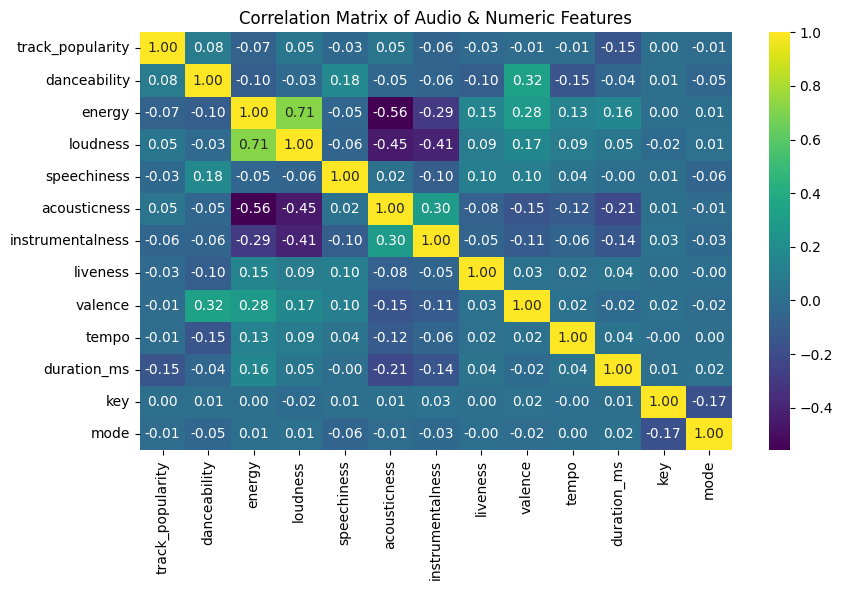

In [107]:
# Plot correlation heatmap with seaborn
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f") # Added annot=True and fmt=".2f"
plt.title("Correlation Matrix of Audio & Numeric Features")
plt.tight_layout()
plt.show()

#Clustering: Tracks by audio features

In [111]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [112]:
# Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_feat)

In [113]:
# Find best k using silhouette score (k from 2 to 8)
best_k = 2
best_score = -1
scores = {}
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores[k] = score
    if score > best_score:
        best_score = score
        best_k = k

In [115]:
# Show silhouette results
sil_df = pd.DataFrame({"k": list(scores.keys()), "silhouette": list(scores.values())})
display(sil_df)

,k,silhouette
0,2,0.226253
1,3,0.088022
2,4,0.097184
3,5,0.092894
4,6,0.087311
5,7,0.093461
6,8,0.097516


In [116]:
# Fit KMeans with best_k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(X_scaled)

In [117]:
# Use PCA (2 components) to plot clusters
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

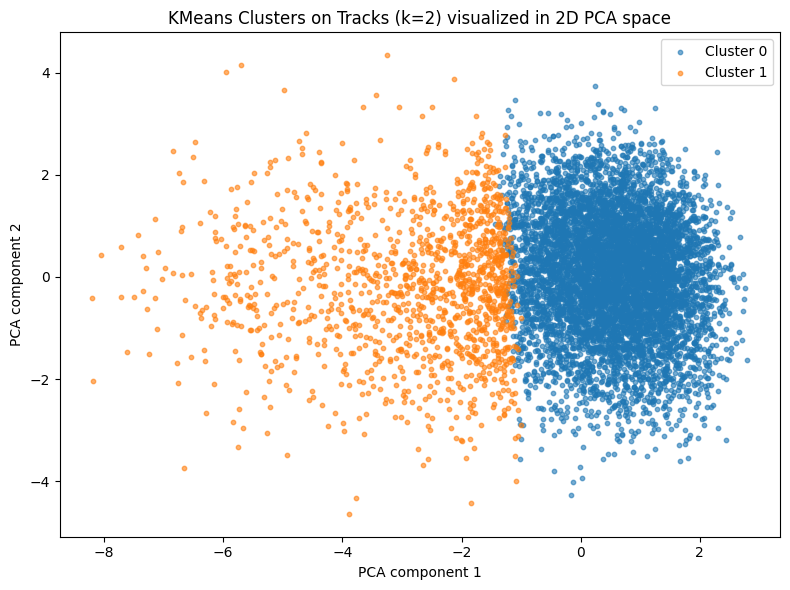

In [119]:
plt.figure(figsize=(8,6))
for lab in sorted(data['cluster'].unique()):
    idx = data['cluster'] == lab
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=f"Cluster {lab}", s=10, alpha=0.6)
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title(f"KMeans Clusters on Tracks (k={best_k}) visualized in 2D PCA space")
plt.legend()
plt.tight_layout()
plt.show()

In [121]:
# Cluster counts and top genres per cluster
cluster_counts = data['cluster'].value_counts().sort_index().rename_axis('cluster').reset_index(name='count')
display(cluster_counts)

,cluster,count
0,0,6878
1,1,1355


In [124]:
# For each cluster, show top playlist_genre and mean feature values
cluster_summary = []
for cl in sorted(data['cluster'].unique()):
    sub = data[data['cluster']==cl]
    top_genre = sub['playlist_genre'].value_counts().idxmax()
    mean_feats = sub[feat].mean().to_dict()
    cluster_summary.append({"cluster": cl, "count": len(sub), "top_genre": top_genre, **{f"mean_{k}": v for k,v in mean_feats.items()}})
cluster_summary_df = pd.DataFrame(cluster_summary)
display(cluster_summary_df.head(50))

,cluster,count,top_genre,mean_track_popularity,mean_danceability,mean_energy,mean_loudness,mean_speechiness,mean_acousticness,mean_instrumentalness,mean_liveness,mean_valence,mean_tempo,mean_duration_ms,mean_key,mean_mode
0,0,6878,pop,44.146845,0.670690,0.729522,-5.946130,0.124771,0.114288,0.032796,0.191196,0.540588,121.532772,222465.039837,5.319279,0.577057
1,1,1355,pop,45.481919,0.643333,0.406698,-10.945245,0.108179,0.535962,0.314631,0.146415,0.381169,112.222154,195416.546125,5.505535,0.561624


# Clustering: Aggregate by playlist_genre then cluster genres

In [125]:
# Aggregate mean audio features by playlist_genre
genre_group = data.groupby('playlist_genre')[feat].mean().reset_index()
genre_features = genre_group[feat].values
genre_scaler = StandardScaler()
genre_scaled = genre_scaler.fit_transform(genre_features)